    Avaliação dos algoritmos

        Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

Carga base de dados

In [2]:
import pickle
import numpy as np

with open( './assets/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento,    X_credit_teste, Y_credit_teste = pickle.load(f)
    
with open( './assets/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

Como será utilizada a validação cruzada nestes casos, a base de dados não precisa estar dividida
por isso é necessário concatenar

In [5]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
Y_credit = np.concatenate((Y_credit_treinamento, Y_credit_teste), axis = 0)
Y_credit.shape

(2000,)

In [7]:
X_census = np.concatenate((X_census_treinamento, X_census_teste), axis = 0)
X_census.shape

(32561, 108)

In [8]:
Y_census = np.concatenate((Y_census_treinamento, Y_census_teste), axis = 0)
Y_census.shape

(32561,)

    Implementação do gridsearch
    Servirá para encontrar os melhores parametros para cada algoritmo

Árvore de decisão

In [9]:
parametros = { 'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1,5,10]             
             }

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


Random forest

In [11]:
param_rf = { 'criterion' : ['gini', 'entropy'],
             'n_estimators' : [10, 40, 100, 150],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1,5,10]             
             }

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_rf)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


Knn

In [13]:
param_knn = { 
    'n_neighbors' : [3, 5, 10, 20],
    'p' : [1, 2]         
             }

In [14]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_knn)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


Regressão logistica

In [15]:
params_rl = {
    'tol' : [0.0001, 0.00001, 0.000001],
    'C' : [1.0, 1.5, 2.0],
    'solver' : ['lbfgs', 'sag', 'saga']
}

In [16]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=params_rl)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


SVM

In [17]:
params_svc = {
    'tol' : [0.001, 0.0001, 0.00001],
    'C' : [1.0, 1.5, 2.0],
    'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']
}

In [18]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=params_svc)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


Redes neurais

In [19]:
params_rn ={
    'activation' : ['relu', 'logistic', 'tahn'],
    'solver' : ['adam', 'sgd'],
    'batch_size' : [10, 56]
}

In [20]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=params_rn)
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score, KFold

In [29]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle=True, random_state=i)
    
    #Arvore
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,                                  min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_credit, Y_credit, cv = kfold)
    resultados_arvore.append(scores.mean())
    
    #Random forest
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                                          min_samples_split=5, n_estimators =10)
    scores = cross_val_score(random_forest, X_credit, Y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())
    
    #knn
    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_credit, Y_credit, cv = kfold)
    resultados_knn.append(scores.mean())
    
    #logistica
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, Y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())
    
    #svm
    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, X_credit, Y_credit, cv = kfold)
    resultados_svm.append(scores.mean())
    
    #rede neural
    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, X_credit, Y_credit, cv = kfold)
    resultados_rede_neural.append(scores.mean())


/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Projetos/Python/mlvenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

    Analise dos resultados
   

In [30]:
import pandas as pd

In [31]:
resultados = pd.DataFrame({'Arvore' : resultados_arvore, 'Random forest' : resultados_random_forest,
                          'KNN' : resultados_knn, 'Logistica' : resultados_logistica,
                          'SVM' : resultados_svm, 'Rede Neural' : resultados_rede_neural})

resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede Neural
0,0.9860,0.9865,0.9815,0.9475,0.9845,0.9965
1,0.9855,0.9830,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9850,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9795,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9845,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9830,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9865,0.9805,0.9470,0.9860,0.9955
7,0.9875,0.9845,0.9800,0.9480,0.9850,0.9975
8,0.9870,0.9840,0.9795,0.9465,0.9840,0.9970
9,0.9875,0.9800,0.9820,0.9465,0.9845,0.9975


In [32]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987317,0.983383,0.980050,0.946950,0.985083,0.997117
std,0.001704,0.002136,0.001533,0.000687,0.001280,0.000583
min,0.983000,0.979500,0.977000,0.945500,0.982000,0.995500
25%,0.986500,0.982500,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.984500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988500,0.982500,0.948500,0.987500,0.998000


In [37]:
#Variação
resultados.var()

Arvore           2.904885e-06
Random forest    4.563506e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede Neural      3.393678e-07
dtype: float64

In [35]:
#Coeficiente de variação
(resultados.std() / resultados.mean()) * 100

Arvore           0.172627
Random forest    0.217233
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede Neural      0.058424
dtype: float64

    Testes normalização

In [38]:
#Teste de Shapiro
alpha = 0.05 #95%

In [39]:
from scipy.stats import shapiro

In [40]:
#Se o pvalue > alpha a distribuição é normal e podemos aplicar anova e tukey
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.972355306148529, pvalue=0.6054266095161438),
 ShapiroResult(statistic=0.9695430397987366, pvalue=0.5267480611801147),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.962294340133667, pvalue=0.35407164692878723),
 ShapiroResult(statistic=0.9064345359802246, pvalue=0.012110840529203415))

In [41]:
import seaborn as sns

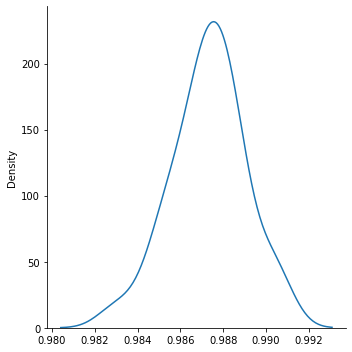

In [44]:
sns.displot(resultados_arvore, kind = 'kde');

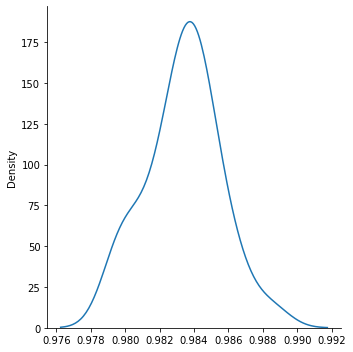

In [46]:
sns.displot(resultados_random_forest, kind = 'kde');

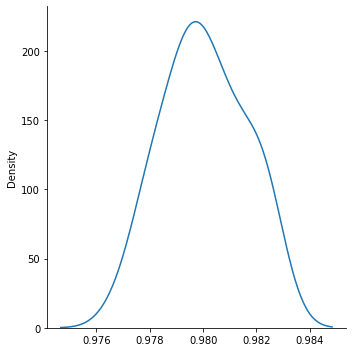

In [48]:
sns.displot(resultados_knn, kind = 'kde');

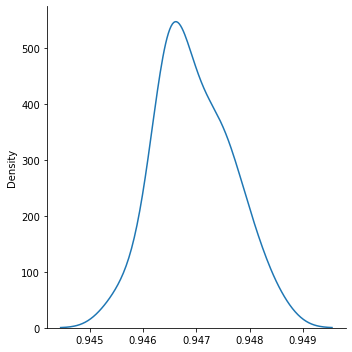

In [49]:
sns.displot(resultados_logistica, kind = 'kde');

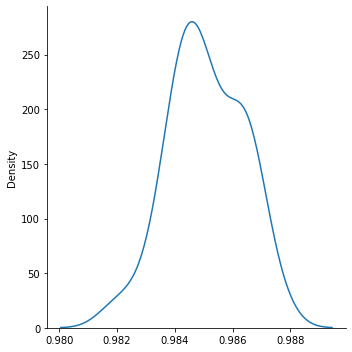

In [50]:
sns.displot(resultados_svm, kind = 'kde');

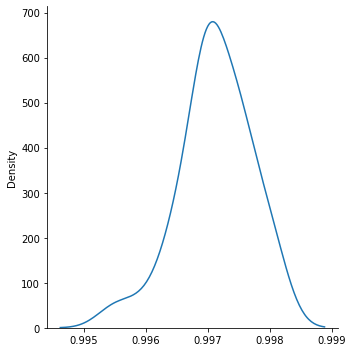

In [51]:
sns.displot(resultados_rede_neural, kind = 'kde');

    Teste de hipotese ANOVA e TUKEY

In [52]:
from scipy.stats import f_oneway #ANOVA

In [56]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm)
p

2.2581199838420746e-143

In [57]:
alpha = 0.05
if p <= alpha:
    print('Hipotese nula rejeitada, Dados São diferentes')
else:
    print('Hipotese alternativa rejeitada. Resultados são iguais')

Hipotese nula rejeitada, Dados São diferentes


In [58]:
#Como os dados são diferentes, podemos testar qual é o melhor

In [63]:
strAlgoritmo = ['arvore']*30 + ['random_forest'] * 30 + ['knn'] * 30 + ['logistica'] * 30 + ['svm'] * 30 + ['rede_neural'] * 30

In [64]:
resultados_algoritmos = {'accuracy' : np.concatenate([resultados_arvore, resultados_random_forest,resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                        'algoritmo' : strAlgoritmo}

In [65]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9980,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [66]:
from statsmodels.stats.multicomp import MultiComparison

In [67]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [68]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0073   -0.0 -0.0083 -0.0062   True
       arvore     logistica  -0.0404   -0.0 -0.0414 -0.0393   True
       arvore random_forest  -0.0039   -0.0  -0.005 -0.0029   True
       arvore   rede_neural   0.0098   -0.0  0.0087  0.0109   True
       arvore           svm  -0.0022    0.0 -0.0033 -0.0012   True
          knn     logistica  -0.0331   -0.0 -0.0342  -0.032   True
          knn random_forest   0.0033   -0.0  0.0023  0.0044   True
          knn   rede_neural   0.0171   -0.0   0.016  0.0181   True
          knn           svm    0.005   -0.0   0.004  0.0061   True
    logistica random_forest   0.0364   -0.0  0.0354  0.0375   True
    logistica   rede_neural   0.0502   -0.0  0.0491  0.0512   True
    logistica           svm   0.0381   -0.0  0.0371  0.0392   

In [69]:
#Isso demonstra que a rede neural é estatisticamente superior

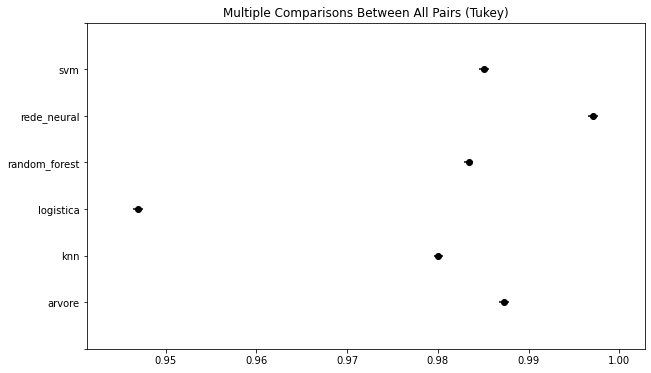

In [70]:
teste_estatistico.plot_simultaneous();